# Question 5

### Question 5 [10 points]

Reproduce one of the images in Figure 2. If you feel adventurous, you can make more than one!

This notebook is dedicated to reproducing figure 2a from Gentemann, Chelle L., Fewings, Melanie R. and García‐Reyes, Marisol. "Satellite sea surface temperatures along the West Coast of the United States during the 2014–2016 northeast Pacific marine heat wave." Geophysical Research Letters 44, no. 1 (2017): 312-319. DOI: 10.1002/2016GL071039.

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.colors


from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

In [70]:
ds_2012 = ds.sel(time=slice('2002', '2012')).analysed_sst
ds_2016 = ds.sel(time=slice('2002', '2016')).analysed_sst

In [71]:
climatology = ds_2012.groupby('time.dayofyear').mean('time')

In [72]:
max_anomolies = (ds_2016.groupby('time.dayofyear') - climatology).max(dim='time')

Ploting the visualization 

Helpful documenatation: [Scitools Matplotlib Documentation.](https://scitools.org.uk/cartopy/docs/latest/reference/matplotlib.html)

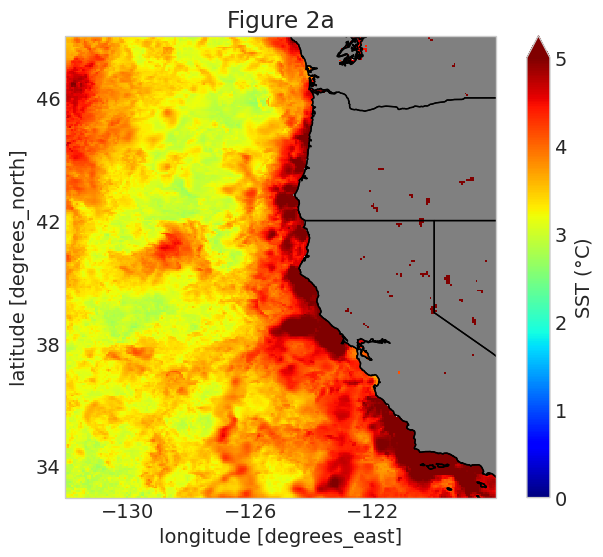

In [73]:
ax = plt.subplot(projection=crs)

max_anomolies.plot(ax=ax,
                   transform=crs,
                   cmap='jet',
                   cbar_kwargs={'label': 'SST ($\degree$C)', 'ticks': np.arange(6)}, 
                   vmin=0,
                   vmax=5)

ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))
ax.coastlines("10m", color="k")

ax.set_yticks([34, 38, 42, 46], minor=False)
ax.set_xticks([-130, -126, -122], minor=False)

plt.title("Figure 2a")
plt.savefig('outputs/q05.png', bbox_inches='tight')

In [74]:
max_month = monthly_anomalies.idxmax(dim='time', skipna=True).dt.month


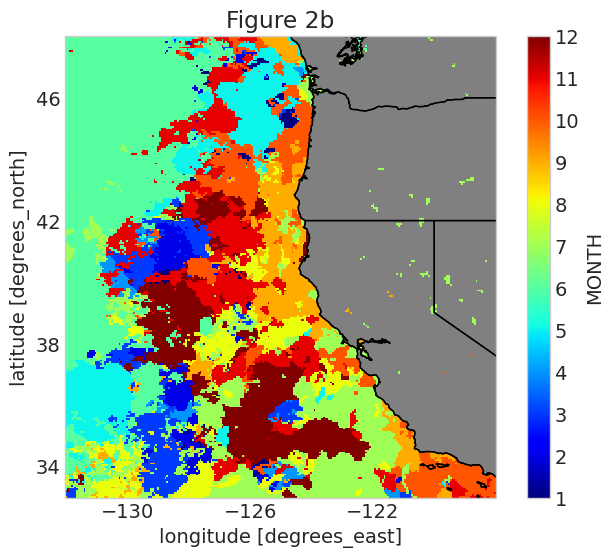

In [75]:
ax = plt.subplot(projection=crs)

max_month.plot(ax=ax,
                   transform=crs,
                   cmap='jet',
                   cbar_kwargs={'label': 'MONTH', 'ticks': np.arange(13)}, 
                   vmin=1,
                   vmax=12)

ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))
ax.coastlines("10m", color="k")

ax.set_yticks([34, 38, 42, 46], minor=False)
ax.set_xticks([-130, -126, -122], minor=False)

plt.title("Figure 2b")
plt.savefig('outputs/q05.png', bbox_inches='tight')

In [79]:
max_year = monthly_anomalies.idxmax(dim='time').dt.year

In [82]:
year_colormap = matplotlib.colors.ListedColormap(["#121ded", "#33ef10", "#e59e1a", "#f2210d"], name = "year_colormap")


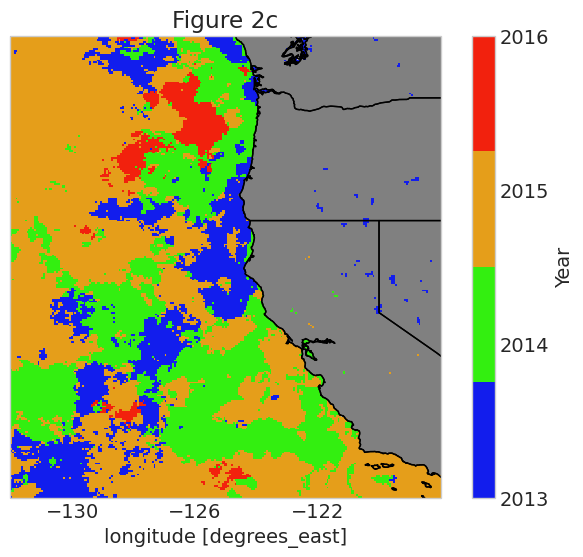

In [85]:
ax = plt.subplot(projection=crs)   
fig=max_year.plot(ax=ax, transform=crs, add_colorbar=False, cmap= year_colormap, vmin=2013, vmax=2016)
cbar = plt.colorbar(fig)
cbar.set_label('Year')
cbar.set_ticks([2013, 2014, 2015, 2016])
ax.set_xticks([-130, -126, -122], minor=False)
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))
ax.coastlines("10m", color="k")
plt.title("Figure 2c")
plt.savefig('outputs/Q05-f2c.png')
